# importing libraries

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Combine all data sets using glob module 

In [72]:
import glob
glob.glob('states*.csv')


['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [73]:
all_dfs=[]
for filename in glob.glob('states*.csv'):
    df=pd.read_csv(filename)
    all_dfs.append(df)
    

In [74]:
df=pd.concat(all_dfs)

In [75]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


# analyzing the data using attribute and pandas function 

In [76]:
df.shape

(60, 11)

In [77]:
df.describe()

,Unnamed: 0,TotalPop
count,60.000000,6.000000e+01
mean,2.500000,6.238516e+06
std,1.722237,6.588488e+06
min,0.000000,6.266040e+05
25%,1.000000,2.030429e+06
50%,2.500000,4.701414e+06
75%,4.000000,7.303256e+06
max,5.000000,3.842146e+07


df.info()

# Cleaning the data by changing data type and removing unnessary signs from all columns

In [79]:
df['Income']=df['Income'].str.lstrip('$').astype(float)

In [80]:
df['Hispanic']=df['Hispanic'].str.rstrip('%').astype(float)

In [81]:
df['White']=df['White'].str.rstrip('%').astype(float)

In [82]:
df['Black']=df['Black'].str.rstrip('%').astype(float)

In [83]:
df['Native']=df['Native'].str.rstrip('%').astype(float)

In [84]:
df['Asian']=df['Asian'].str.rstrip('%').astype(float)

In [85]:
df['Pacific']=df['Pacific'].str.rstrip('%').astype(float)

# now divide GenderPop column into male and female so that we can get insights of both

In [86]:
df[['Male','FeMale']]=df['GenderPop'].str.split('_',expand=True)

In [87]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,FeMale
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135M,19334329F


In [88]:

df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
Male          0
FeMale        0
dtype: int64

# Now removing the unnessary charcters from columns and changing their type

In [89]:
df['Male']=df['Male'].str.rstrip("M").astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     float64
 4   White       60 non-null     float64
 5   Black       60 non-null     float64
 6   Native      60 non-null     float64
 7   Asian       60 non-null     float64
 8   Pacific     55 non-null     float64
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Male        60 non-null     int32  
 12  FeMale      60 non-null     object 
dtypes: float64(7), int32(1), int64(2), object(3)
memory usage: 6.3+ KB


In [91]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,FeMale
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527F
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215F
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840F
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295F
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329F


In [92]:
df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
Male          0
FeMale        0
dtype: int64

# As all column have no null values except one column and i am filling that by using mean

In [93]:
df['Pacific']=df['Pacific'].fillna(df['Pacific'].mean())

In [94]:
df.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       0
Income        0
GenderPop     0
Male          0
FeMale        0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [98]:
df['FeMale']=df['FeMale'].str.rstrip('F')

# Now making scatter plot of income of female but it gives me error because i did not change the data type of female

In [102]:
plt.scatter(df['FeMale'] / df['TotalPop'], df['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# After removing from (F) from Female column now some column have null values which i first replace then converting therir type to int

In [108]:
df['FeMale'] = df['FeMale'].fillna(df['TotalPop'] - df['Male'])
print(df['FeMale'])

0     2489527
1      349215
2     3342840
3     1506295
4    19334329
5     2630239
0     2630239
1     1841615
2      478041
3      340810
4    10045763
5     5123362
0     5123362
1      696428
2      806083
3     6556862
4     3333382
5     1558931
0     1558931
1     1453125
2     2233145
3     2364097
4      679019
5            
0            
1     3455936
2     5038598
3     2727005
4     1536358
5     3081445
0     3081445
1            
2      939759
3     1390901
4      670717
5     4561386
0     4561386
1     1051703
2    10131373
3     5049925
4      353677
5     5913084
0     5913084
1     1942789
2     1990780
3     6534215
4     1869213
5      543273
0      543273
1     2455167
2      419713
3     3331859
4    13367298
5     1444150
0     1444150
1      318031
2     4195682
3     3497739
4      937789
5     2890732
Name: FeMale, dtype: object


In [114]:

df['FeMale'] = pd.to_numeric(df['FeMale'], errors='coerce')


# Checking the duplicates and drop them using drop_duplicates methodm

In [107]:
df.drop_duplicates(inplace=True)


# now you see scatter plot 

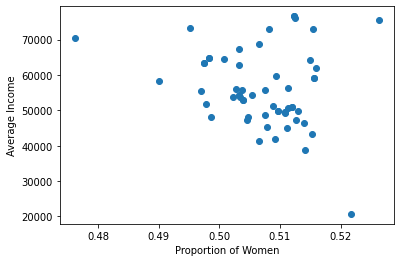

In [115]:
plt.scatter(df['FeMale'] / df['TotalPop'], df['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')
plt.show()

# Making Histogram of each column m

In [116]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,FeMale
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


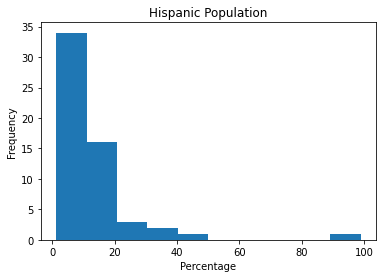

In [118]:
plt.hist(df['Hispanic'], bins=10)
plt.title('Hispanic Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


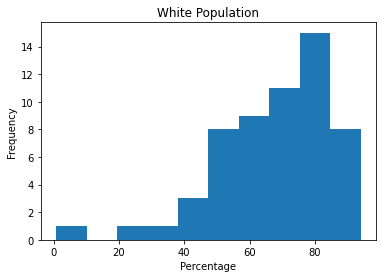

In [119]:
plt.hist(df['White'], bins=10)
plt.title('White Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


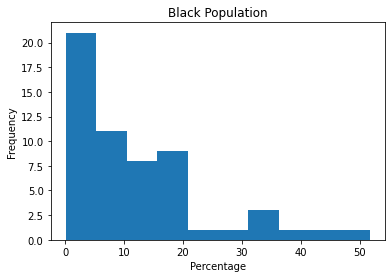

In [120]:
plt.hist(df['Black'], bins=10)
plt.title('Black Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

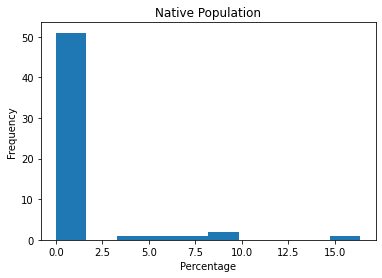

In [121]:
plt.hist(df['Native'], bins=10)
plt.title('Native Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

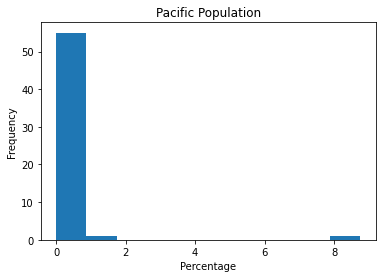

In [122]:
plt.hist(df['Pacific'], bins=10)
plt.title('Pacific Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()